# Secretary Problem

The Secretary Problem, also known as the marriage problem or sultan's dowry problem, is a classic problem in decision theory and probability theory. The scenario involves making a decision on selecting the best option from a sequence of candidates or options. The problem is often framed as hiring a secretary, but it can be applied to various situations such as choosing a house, a spouse, or any other scenario where you sequentially evaluate options and must make a decision.

In this problem, you receive $T$ offers and must either accept or reject the offer "on the spot". You cannot return to a previous offer once you have moved on to the next one. Offers are in random order and can be ranked against those previously seen. The aim is to maximize the probability of choosing the offer with the greatest rank. There is an optimal $r$ ($1 \le r < T$) to be determined such that we examine and reject the first $r$ offers. Then of the remaining $T - r$ offers we choose the first one that is best seen to date.

## The 37% Rule

A decision strategy involves setting a threshold such that the first candidate above this threshold is hired, and all candidates below the threshold are rejected. The optimal strategy suggests that one should reject the first $r=T/e$ candidates and then select the first candidate who is better than all those seen so far.

The reasoning behind the 37% rule is based on the idea of balancing exploration and exploitation. By rejecting the first $T/e$ candidates, you gain a sense of the quality of the candidates but avoid committing too early. After that point, you select the first candidate who is better than the best among the initial $r$ candidates.

## Mathematical Background

To solve the secretary problem, we use the principle of optimality due to Richard Bellman. The state $x_t=1$ if the $t$-th candidate is the best seen so far and $x_t=0$ otherwise. The decision $d_t=1$ if the $t$-th candidate is hired and $d_t=0$ otherwise. The utility function is $u(x_t,d_t) = x_t d_t$.

The probability of success given we reject the first $r$ candidates is:
$$
P(\text{success}) = \frac{1}{T}\sum_{a=r+1}^T \frac{r}{a} \approx \frac{r}{T} \int_{r}^{T} \frac{1}{a} da = \frac{r}{T} \log \left ( \frac{T}{r} \right ).
$$

Optimizing over $r$ gives $r = T/e$, and the maximum probability of success is $1/e \approx 37\%$. 

## Monte Carlo Simulations

We can use Monte Carlo simulations to verify the theoretical result and explore other objectives, such as maximizing the average quality of the selected candidate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def secretary_simulation(n=1000, nmc=1000):
    """
    Simulates the secretary problem to find the optimal threshold.
    n: total number of candidates
    nmc: number of Monte Carlo runs per threshold
    """
    np.random.seed(17)
    
    # Test thresholds from 0.2% to 80% of total candidates
    rules = np.unique(np.round(n * np.linspace(0.002, 0.8, 300)).astype(int))
    rules = rules[rules > 0]
    
    success_rate = np.zeros(len(rules))
    average_quality = np.zeros(len(rules))
    
    for i, r in enumerate(rules):
        for _ in range(nmc):
            # Candidates ranked 1 to n (n is best)
            candidates = np.random.permutation(np.arange(1, n + 1))
            
            # Screening phase (reject the first r candidates)
            screen = candidates[:r]
            best_screen = np.max(screen) if len(screen) > 0 else 0
            
            # Selection phase (pick the first candidate better than best_screen)
            choices = candidates[r:]
            selected = None
            for c in choices:
                if c > best_screen:
                    selected = c
                    break
            
            # If no one better is found, pick the very last candidate
            if selected is None:
                selected = candidates[-1]
            
            # Check if we picked the absolute best candidate
            if selected == n:
                success_rate[i] += 1
            
            average_quality[i] += selected
            
    return rules, success_rate / nmc, average_quality / n

# Run simulation
rules, prob_best, avg_quality = secretary_simulation()

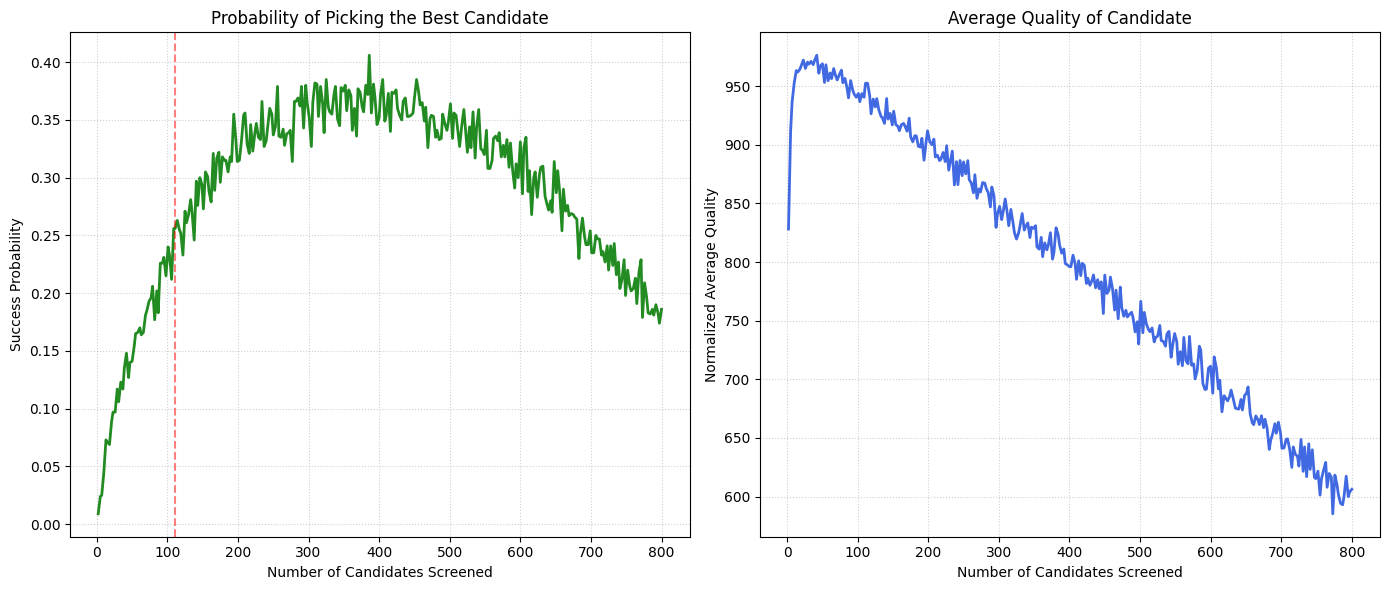

In [2]:
# Plotting the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(rules, prob_best, color='forestgreen', linewidth=2)
plt.axvline(x=len(prob_best)*0.37, color='red', linestyle='--', alpha=0.5, label='37% Threshold')
plt.title("Probability of Picking the Best Candidate")
plt.xlabel("Number of Candidates Screened")
plt.ylabel("Success Probability")
plt.grid(True, linestyle=':', alpha=0.6)

plt.subplot(1, 2, 2)
plt.plot(rules, avg_quality, color='royalblue', linewidth=2)
plt.title("Average Quality of Candidate")
plt.xlabel("Number of Candidates Screened")
plt.ylabel("Normalized Average Quality")
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

## Conclusion

The left plot confirms the theoretical result: the probability of selecting the best candidate peaks at approximately 37% when we screen roughly 370 out of 1000 candidates (close to $T/e$). 

The right plot reveals an interesting trade-off: average quality peaks much earlier. This happened because being too selective (screening too many) increases the risk of rejecting all strong candidates and being forced to accept the last one, regardless of quality. The two plots illustrate the tension between *maximizing the chance of finding the absolute best* and *maximizing expected quality*.